In [1]:
from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import gym

from Nabatchikov_practice2_1 import CEM
from Nabatchikov_practice2_2 import CEM2

pd.set_option('display.max_rows', 500)

In [2]:
columns=["q_param", "trajectory_n", "epochs", "trajectory_len", "mean_total_reward", "max_total_reward"]

# Task 1 Acrobot-v1

In [12]:
env = gym.make('Acrobot-v1')
df = []
results = []

epochs=50
q_params = (0.9, 0.6, 0.4)
trajectory_n = 200
trajectory_len = (300, 600)
for q, length in tqdm(product(q_params, trajectory_len)):
    agent = CEM(state_dim=6, action_n=3)
    result = agent.fit(env=env, epochs=epochs, q_param=q, trajectory_n=trajectory_n, trajectory_len=length)
    results.append(result)
    df.append([q, trajectory_n, epochs, length, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])


0it [00:00, ?it/s]/Users/ilyanabatchikov/Library/Caches/pypoetry/virtualenvs/ods-deep-rl-e31fa5SG-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
6it [10:33, 105.66s/it]


In [9]:
df_res = pd.DataFrame(df, columns=columns)

In [10]:
df_res

,q_param,trajectory_n,epochs,trajectory_len,mean_total_reward,max_total_reward
0,0.9,200,50,300,-82.370,-61.0
1,0.9,200,50,600,-500.000,-500.0
2,0.6,200,50,300,-90.180,-61.0
3,0.6,200,50,600,-83.765,-63.0
4,0.4,200,50,300,-300.000,-300.0
5,0.4,200,50,600,-85.225,-62.0


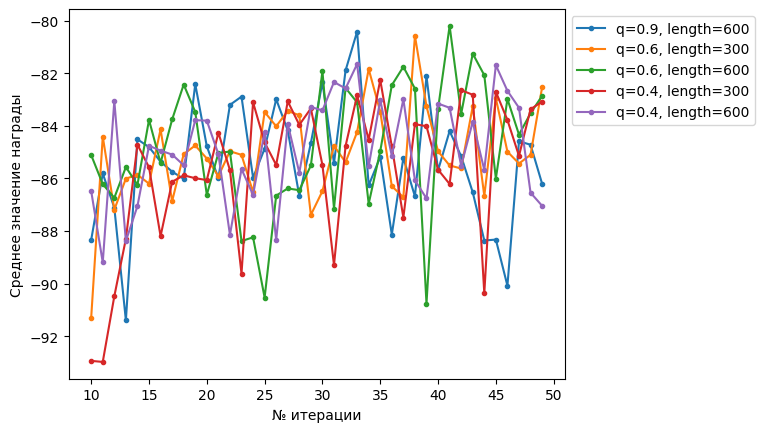

In [15]:
i = 10

q_params = (0.9, 0.6, 0.4)
trajectory_len = (300, 600)
for exp, (q, length) in zip(results, product(q_params, trajectory_len)):
    if q != 0.9 or length != 300:
        indices = [r["iteration:"] for r in exp["info"][i:]]
        values = [r["mean_total_reward"] for r in exp["info"][i:]]
        plt.plot(indices, values, marker='o', label=f"q={q}, length={length}", markersize=3)

plt.xlabel('№ итерации')
plt.ylabel('Среднее значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

In [17]:
best_params = df_res[df_res.mean_total_reward == df_res.mean_total_reward.max()]
best_params = best_params[best_params.max_total_reward == best_params.max_total_reward.max()]

best_params

,q_param,trajectory_n,epochs,trajectory_len,mean_total_reward,max_total_reward
0,0.9,200,50,300,-82.37,-61.0


# Task 2 MountainCarContinuous-v0

In [24]:
env = gym.make('MountainCarContinuous-v0')
df2 = []
results2 = []

epochs=50
q_params = (0.9, 0.95, 0.99)
trajectory_n = 500
trajectory_len = (1000, 2000)
for q, length in tqdm(product(q_params, trajectory_len)):
    agent = CEM2(state_dim=2)
    result = agent.fit(env=env, epochs=epochs, q_param=q, trajectory_n=trajectory_n, trajectory_len=length)
    results2.append(result)
    df2.append([q, trajectory_n, epochs, length, result["info"][-1]["mean_total_reward"], result["info"][-1]["max_total_reward"]])


6it [3:30:52, 2108.80s/it]


In [25]:
df2_res = pd.DataFrame(df2, columns=columns)

In [26]:
df2_res

,q_param,trajectory_n,epochs,trajectory_len,mean_total_reward,max_total_reward
0,0.90,500,50,1000,-0.096743,-0.081456
1,0.90,500,50,2000,-0.089431,-0.077653
2,0.95,500,50,1000,-0.102779,-0.089485
3,0.95,500,50,2000,-0.118972,-0.097980
4,0.99,500,50,1000,-0.121035,-0.081422
5,0.99,500,50,2000,-0.087041,-0.078708


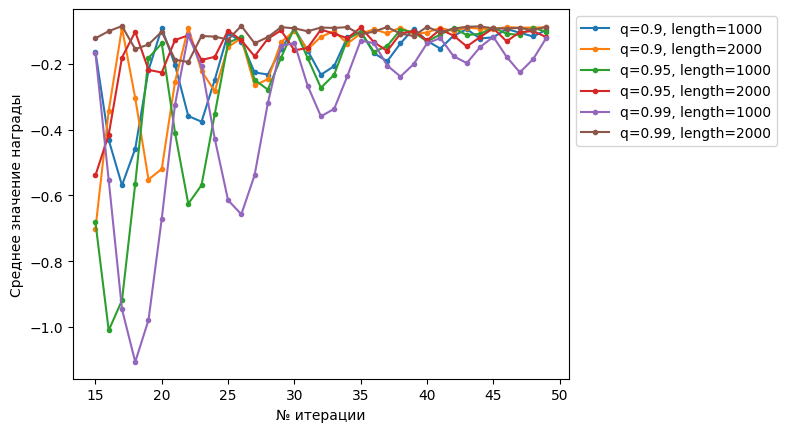

In [30]:
i = 15

q_params = (0.9, 0.95, 0.99)
trajectory_len = (1000, 2000)
for exp, (q, length )in zip(results2, product(q_params, trajectory_len)):
    indices = [r["iteration:"] for r in exp["info"][i:]]
    values = [r["mean_total_reward"] for r in exp["info"][i:]]
    plt.plot(indices, values, marker='o', label=f"q={q}, length={length}", markersize=3)

plt.xlabel('№ итерации')
plt.ylabel('Среднее значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

In [29]:
best_params = df2_res[df2_res.mean_total_reward == df2_res.mean_total_reward.max()]
best_params = best_params[best_params.max_total_reward == best_params.max_total_reward.max()]

best_params

,q_param,trajectory_n,epochs,trajectory_len,mean_total_reward,max_total_reward
5,0.99,500,50,2000,-0.087041,-0.078708
